In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import psycopg2

from sqlalchemy import create_engine
from pg import pg_key

# engine = create_engine('postgresql://localhost:5432/postgres')
dbengine = "postgresql://postgres:" + pg_key +"@localhost:5432/postgres"
engine = create_engine(dbengine)
connection = engine.connect()

In [2]:
data = pd.read_sql('select * from salaries', connection)
data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [3]:
data1 = data.salary.max()
data1

129492

In [4]:
data1 = data.salary.min()
data1

40000

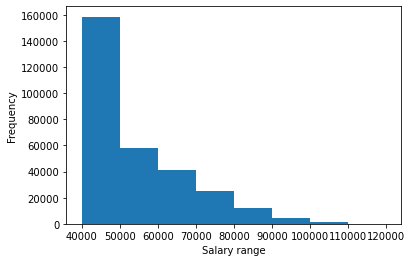

In [5]:
bins = [40000,50000,60000,70000,80000,90000,100000,110000,120000]
plt.hist(data['salary'], bins=bins) 
plt.ylabel('Frequency')
plt.xlabel('Salary range');

In [6]:
# title = pd.read_sql('select title_id as emp_title_id, title from titles', connection)
title = pd.read_sql('select * from titles', connection)
title



,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
emp = pd.read_sql('select * from employees', connection)
emp

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [8]:
title_emp = pd.merge(title,emp, how = 'inner', left_on='title_id', right_on='emp_title_id')
title_emp

,title_id,title,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,s0001,Staff,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,s0001,Staff,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
2,s0001,Staff,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
3,s0001,Staff,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25
4,s0001,Staff,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28
...,...,...,...,...,...,...,...,...,...
300019,m0001,Manager,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01
300020,m0001,Manager,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30
300021,m0001,Manager,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01
300022,m0001,Manager,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14


In [9]:
title_emp_sal = pd.merge(title_emp,data, how = 'inner', on='emp_no')
title_emp_sal

,title_id,title,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,s0001,Staff,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,s0001,Staff,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
2,s0001,Staff,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087
3,s0001,Staff,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084
4,s0001,Staff,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016
...,...,...,...,...,...,...,...,...,...,...
300019,m0001,Manager,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446
300020,m0001,Manager,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148
300021,m0001,Manager,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026
300022,m0001,Manager,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000


In [10]:
avg_sal_tit = title_emp_sal.groupby('title').mean()
avg_sal_tit

,emp_no,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


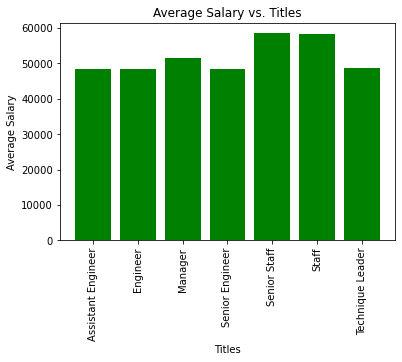

In [11]:
avg_sal = avg_sal_tit["salary"]
x_axis = avg_sal.index.values
y_axis = avg_sal.values
plt.bar(x_axis, y_axis, color='green', align='center')


# The following commands add labels to our figure.
plt.xlabel('Titles')
plt.ylabel('Average Salary')
plt.title('Average Salary vs. Titles')
plt.xticks(rotation="vertical")
plt.show()